In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Install libraries

In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 5.1 MB/s 
     |████████████████████████████████| 140 kB 28.3 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 1.1 MB 51.6 MB/s 
     |████████████████████████████████| 212 kB 61.1 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 596 kB 52.8 MB/s 
     |████████████████████████████████| 127 kB 49.9 MB/s 
     |████████████████████████████████| 271 kB 45.5 MB/s 
     |████████████████████████████████| 144 kB 83.1 MB/s 
     |████████████████████████████████| 94 kB 2.4 MB/s 
     |████████████████████████████████| 112 kB 57.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing ins

In [3]:
pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 4.4 MB/s 
     |████████████████████████████████| 235 kB 43.2 MB/s 
     |████████████████████████████████| 581 kB 62.5 MB/s 
     |████████████████████████████████| 965 kB 43.1 MB/s 


#Download XNLI dataset

In [4]:
from datasets import load_dataset
import pandas as pd
from tqdm.auto import tqdm
import os
from normalizer import normalizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [5]:
vi_dataset = load_dataset("xnli",language='vi')
en_dataset = load_dataset("xnli",language='en')

Using custom data configuration default-language=vi


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xnli downloaded and prepared to /root/.cache/huggingface/datasets/xnli/default-language=vi/1.1.0/818164464f9c9fd15776ca8a00423b074344c3e929d00a2c1a84aa5a50c928bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Using custom data configuration default-language=en


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xnli downloaded and prepared to /root/.cache/huggingface/datasets/xnli/default-language=en/1.1.0/818164464f9c9fd15776ca8a00423b074344c3e929d00a2c1a84aa5a50c928bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
vi_dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})

In [7]:
en_dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})

In [8]:
vi_train=pd.DataFrame(vi_dataset['train'])
vi_valid=pd.DataFrame(vi_dataset['validation'])
vi_test=pd.DataFrame(vi_dataset['test'])

In [9]:
en_train=pd.DataFrame(en_dataset['train'])
en_valid=pd.DataFrame(en_dataset['validation'])
en_test=pd.DataFrame(en_dataset['test'])

Concatenate two datasets



In [12]:
def merge_en_vi_pairs(en,vi):
  # en set, vi set set must have the same size

  en_premises=en['premise']
  en_hypothesises=en['hypothesis']
  en_labels=en['label']

  vi_premises=vi['premise']
  vi_hypothesises=vi['hypothesis']
  vi_labels=vi['label']

  pairs=[]
  num_samples=len(en)
  bar=tqdm(range(num_samples))

  for i in range(num_samples):
    if en_labels[i]==vi_labels[i]:
      en_norm_premise=normalizer(en_premises[i],lang='en')
      vi_norm_premise=normalizer(vi_premises[i],lang='vi')
      en_norm_hypothesis=normalizer(en_hypothesises[i],lang='en')
      vi_norm_hypothesis=normalizer(vi_hypothesises[i],lang='vi')

      pairs.append({
          'en_premise':en_norm_premise,
          'vi_premise':vi_norm_premise,
          'en_hypothesis':en_norm_hypothesis,
          'vi_hypothesis':vi_norm_hypothesis,
          'label':en_labels[i],
      })
    bar.update()
  
  return pd.DataFrame(pairs)

In [13]:
train=merge_en_vi_pairs(en_train,vi_train)
valid=merge_en_vi_pairs(en_valid,vi_valid)

  0%|          | 0/392702 [00:00<?, ?it/s]

  0%|          | 0/2490 [00:00<?, ?it/s]

In [14]:
dataset_directory='/content/drive/MyDrive/en-vi-nli/dataset'
os.makedirs(dataset_directory,exist_ok=True)

In [15]:
train.to_csv(f'{dataset_directory}/train.csv',index=False)
valid.to_csv(f'{dataset_directory}/valid.csv',index=False)
en_test.to_csv(f'{dataset_directory}/en_test.csv',index=False)
vi_test.to_csv(f'{dataset_directory}/vi_test.csv',index=False)

#Create cross linguistic sentences pairs dataset

In [19]:
import pandas as pd

In [20]:
dataset_directory='/content/drive/MyDrive/en-vi-nli/dataset'

In [21]:
train=pd.read_csv(f'{dataset_directory}/train.csv')
valid=pd.read_csv(f'{dataset_directory}/valid.csv')

In [26]:
train=train[(~train['vi_hypothesis'].isna())&(~train['en_premise'].isna())&(~train['vi_premise'].isna())&(~train['en_hypothesis'].isna())]

In [29]:
train.value_counts(['label'])

label
2        130876
0        130874
1        130874
dtype: int64

In [30]:
valid.value_counts(['label'])


label
0        830
1        830
2        830
dtype: int64

suppose to generate dataset with the following column

- premise_language
- hypothesis_language
- premise_sentence
- hypothesis_sentence
- label

So, the final dataset will contains

- en-vi pairs
- vi-en pairs (not yet)
- en-en pairs (not yet)
- vi-vi pairs

In [31]:
pairs_type=[
  ['en','vi'],['vi','vi'],['vi','en'],['en','en']
]

In [35]:
def create_sentences_pairs_dataset(df):
  pairs=[]
  for idx,i in enumerate(pairs_type):
    
    premise_language=f'{i[0]}_premise'
    hypothesis_language=f'{i[1]}_hypothesis'

    pair=df[[premise_language,hypothesis_language,'label']]
    pair['premise_language']=[i[0]]*len(df)
    pair['hypothesis_language']=[i[1]]*len(df)
    pair.rename(columns={premise_language:'premise',hypothesis_language:'hypothesis'},inplace=True)  
    pairs.append(pair)
  return pairs

In [36]:
pairs=create_sentences_pairs_dataset(train)
pairs=pd.concat(pairs,axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [37]:
bilingual_dataset_directory='/content/drive/MyDrive/en-vi-nli/bilingual_dataset'
os.makedirs(bilingual_dataset_directory,exist_ok=True)

In [38]:
pairs.to_csv(f'{bilingual_dataset_directory}/train.csv',index=False)

In [39]:
valid_pairs=create_sentences_pairs_dataset(valid)
valid_pairs=pd.concat(valid_pairs,axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [40]:
valid_pairs.to_csv(f'{bilingual_dataset_directory}/valid.csv',index=False)

#Visualize sequence length distribution

Note: Because the dataset is tokenized already -> use whitespace tokenizer

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
bilingual_dataset_directory='/content/drive/MyDrive/en-vi-nli/bilingual_dataset'

In [43]:
train=pd.read_csv(f'{bilingual_dataset_directory}/train.csv')
valid=pd.read_csv(f'{bilingual_dataset_directory}/valid.csv')

In [44]:
train[(~train['premise'].isna())&(~train['hypothesis'].isna())]

,premise,hypothesis,label,premise_language,hypothesis_language
0,Conceptually cream skimming has two basic dime...,Sản phẩm và địa lý là những gì làm cho kem ski...,1,en,vi
1,you know during season and i guess at your lev...,Anh sẽ mất mọi thứ ở mức độ sau nếu người dân ...,0,en,vi
2,One of our number will carry out your instruct...,Một thành viên trong đội của tôi sẽ thực hiện ...,0,en,vi
3,How do you know All this their information again,Thông tin này thuộc về họ,0,en,vi
4,i tell you what though if you go price some of...,Đôi giày tennis có một tầm giá,1,en,vi
...,...,...,...,...,...
1570491,Clearly California can and must do better,California can not do any better,2,en,en
1570492,It was once regarded as most beautiful street ...,So many of original buildings had been replace...,1,en,en
1570493,Houseboats are beautifully preserved tradition...,The tradition of houseboats originated while B...,0,en,en
1570494,Obituaries fondly recalled his on air debates ...,The obituaries were beautiful and written in k...,1,en,en


In [45]:
def whitespace_tokenizer(s):
  return s.split()

In [46]:
def get_seq_length(s):
  toks=whitespace_tokenizer(s)
  return len(toks)

In [47]:
train['premise_length']=train['premise'].map(get_seq_length)
train['hypothesis_length']=train['hypothesis'].map(get_seq_length)
train['total_length']=train['premise_length']+train['hypothesis_length']

In [49]:
valid['premise_length']=valid['premise'].map(get_seq_length)
valid['hypothesis_length']=valid['hypothesis'].map(get_seq_length)
valid['total_length']=valid['premise_length']+valid['hypothesis_length']

In [50]:
def seq_len_visualizer(x,y):
  fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(20,20))
  ax.bar(x,y)
  fig.show()

Visualize en-vi premise length distribution



(None, 440)

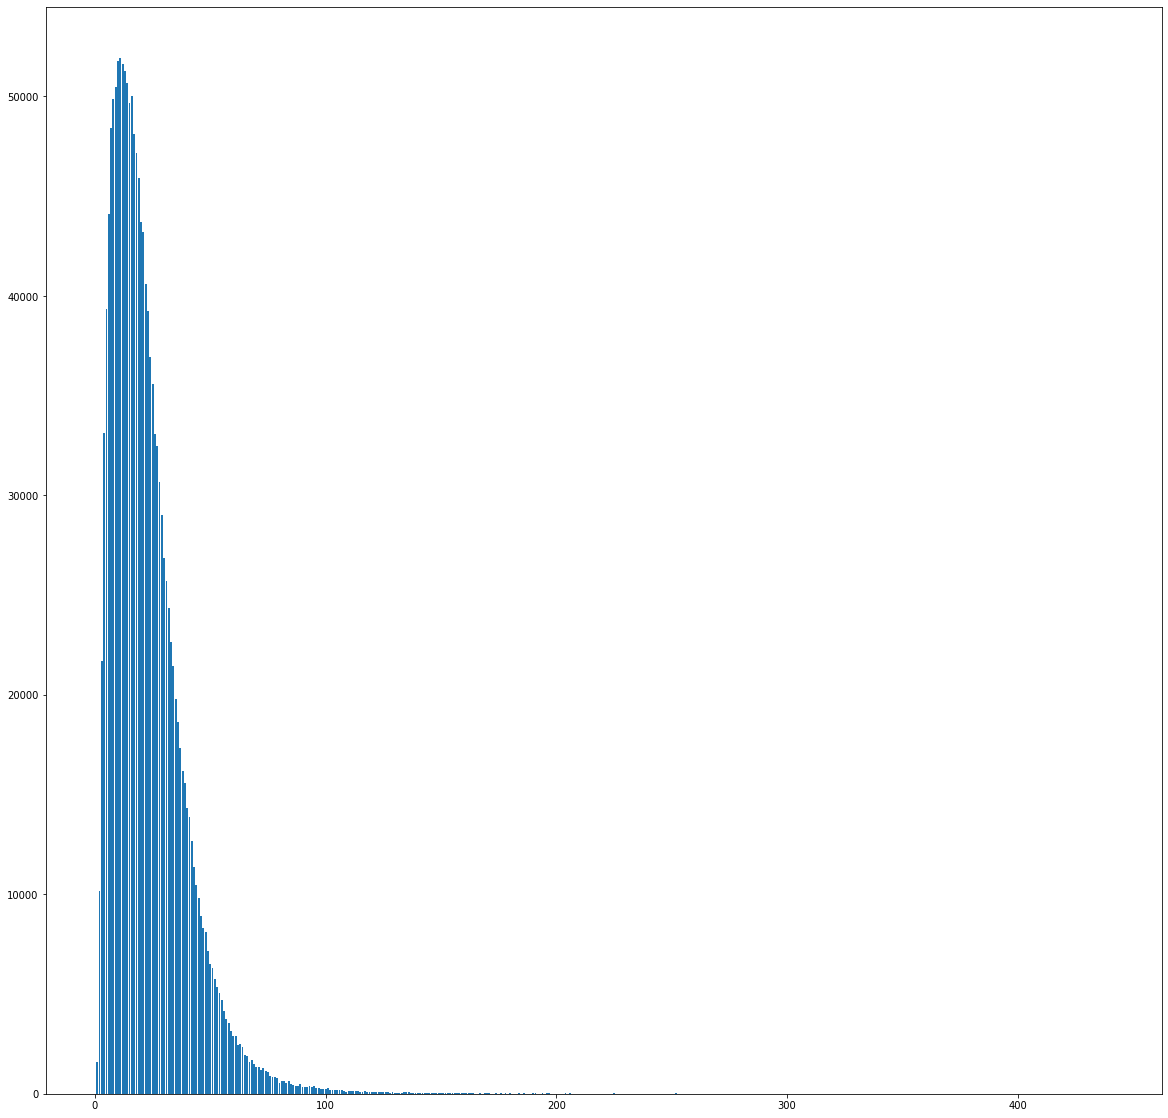

In [51]:
value_counts=train['premise_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize en-vi hypothesis length distribution

(None, 97)

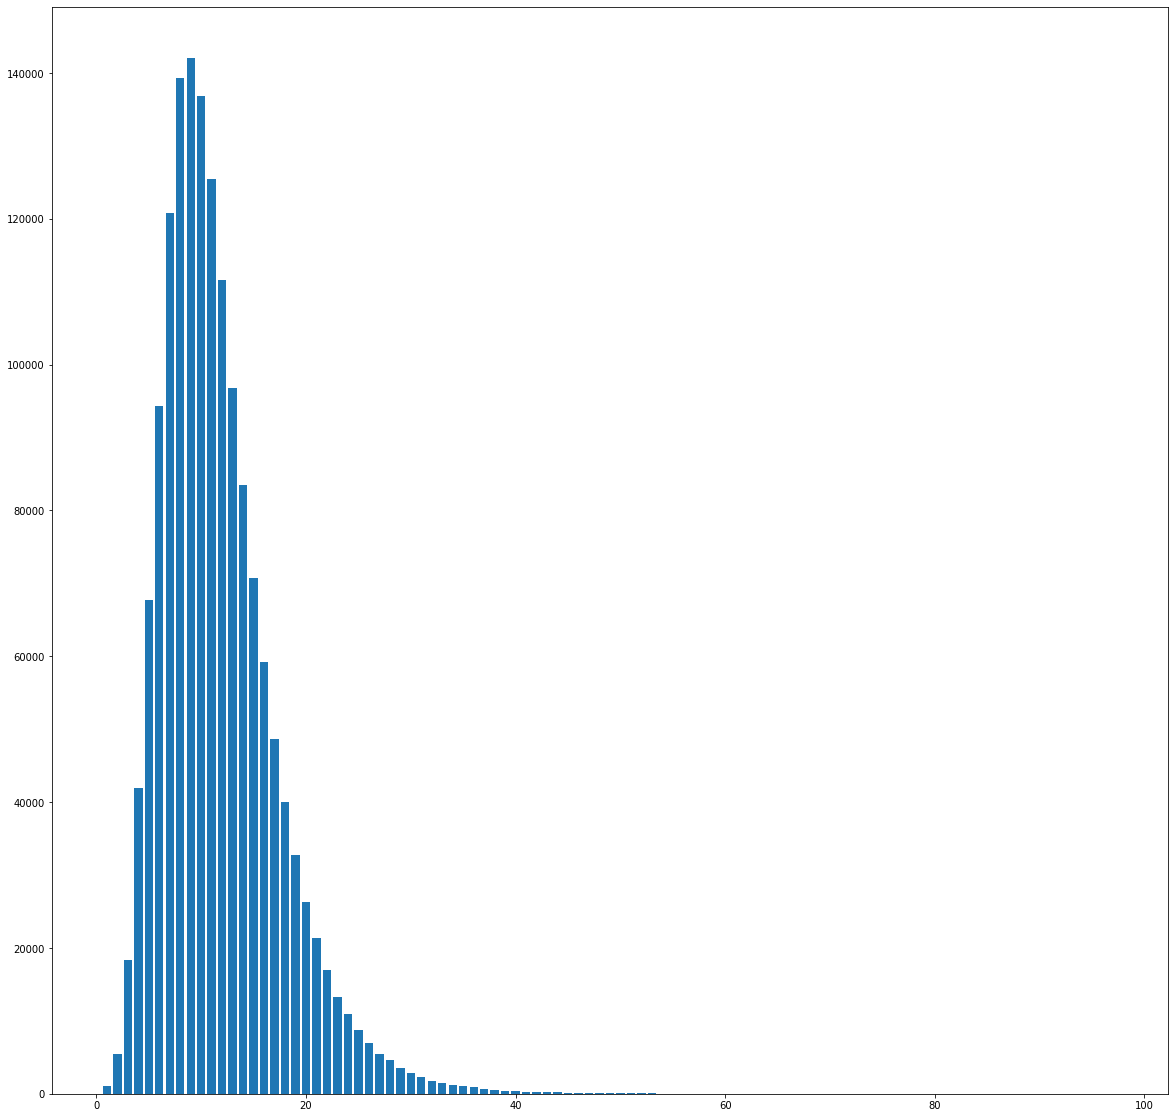

In [53]:
value_counts=train['hypothesis_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize en-vi total length distribution


(None, 459)

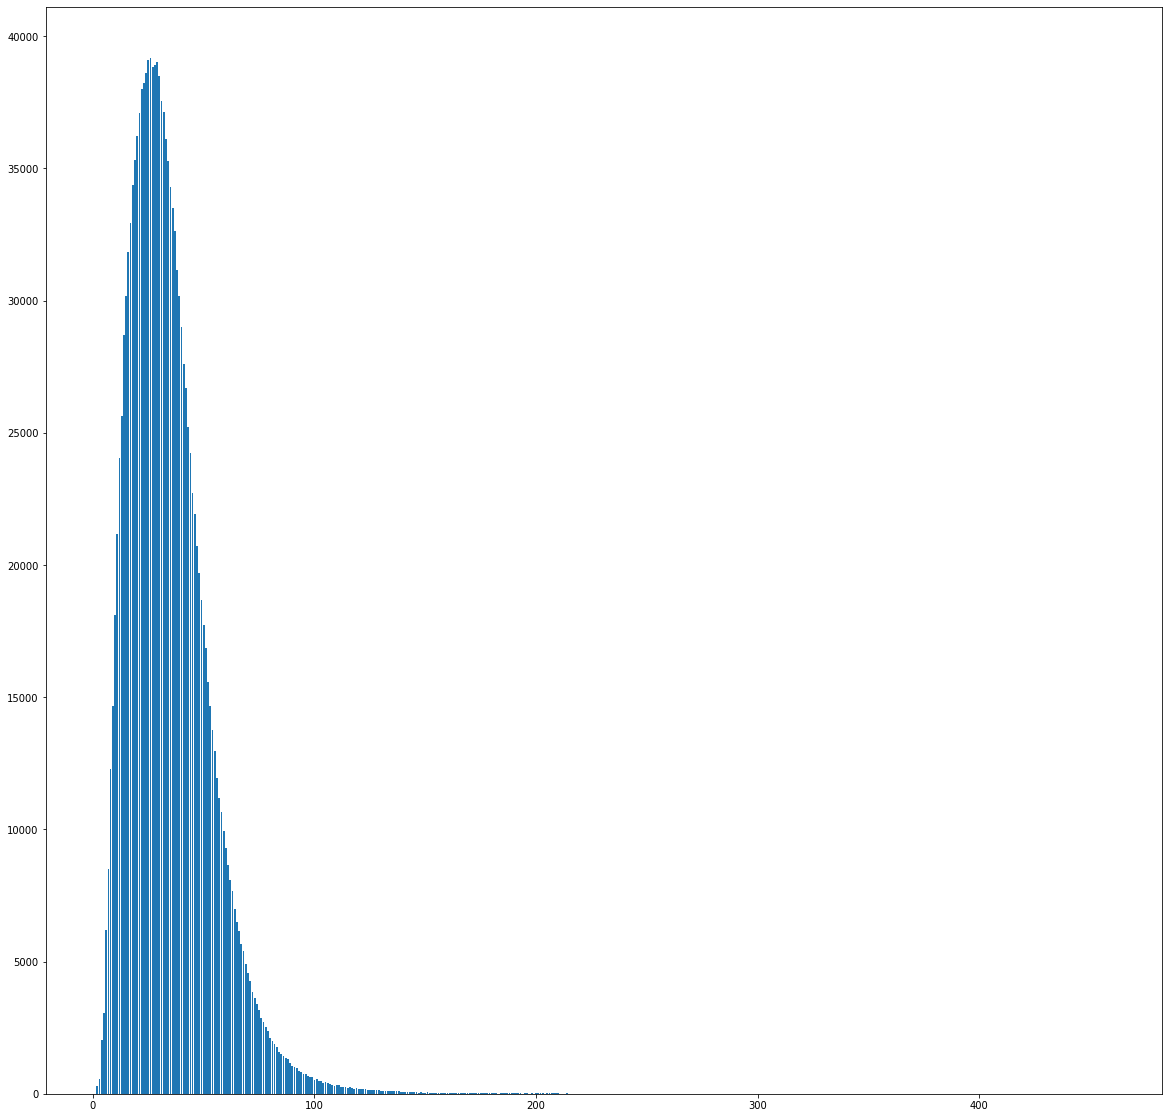

In [54]:
value_counts=train['total_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize vi-vi premise length distribution



(None, 75)

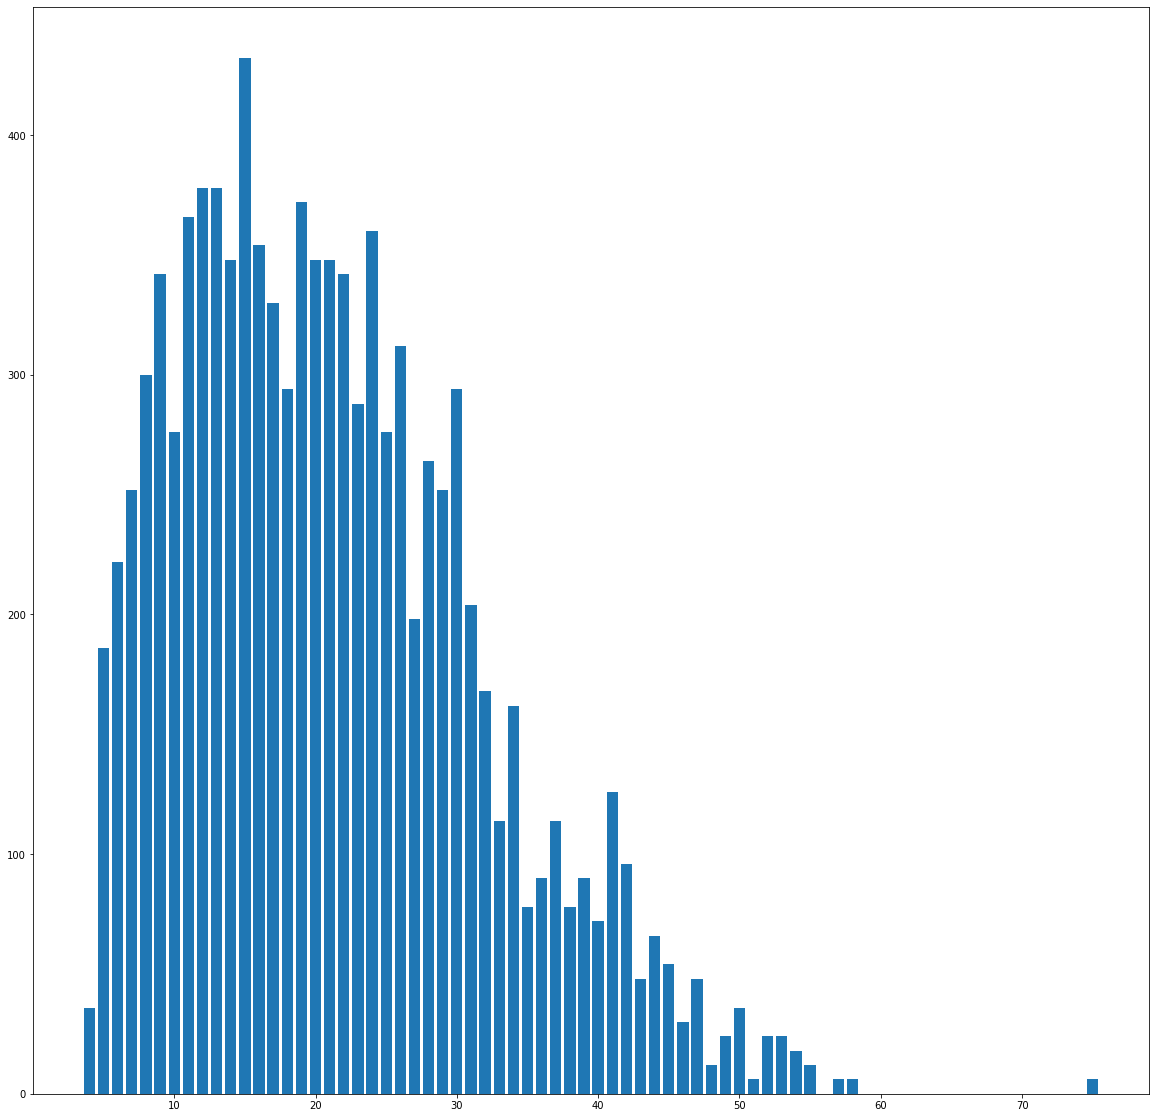

In [55]:
value_counts=valid['premise_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize vi-vi hypothesis length distribution



(None, 35)

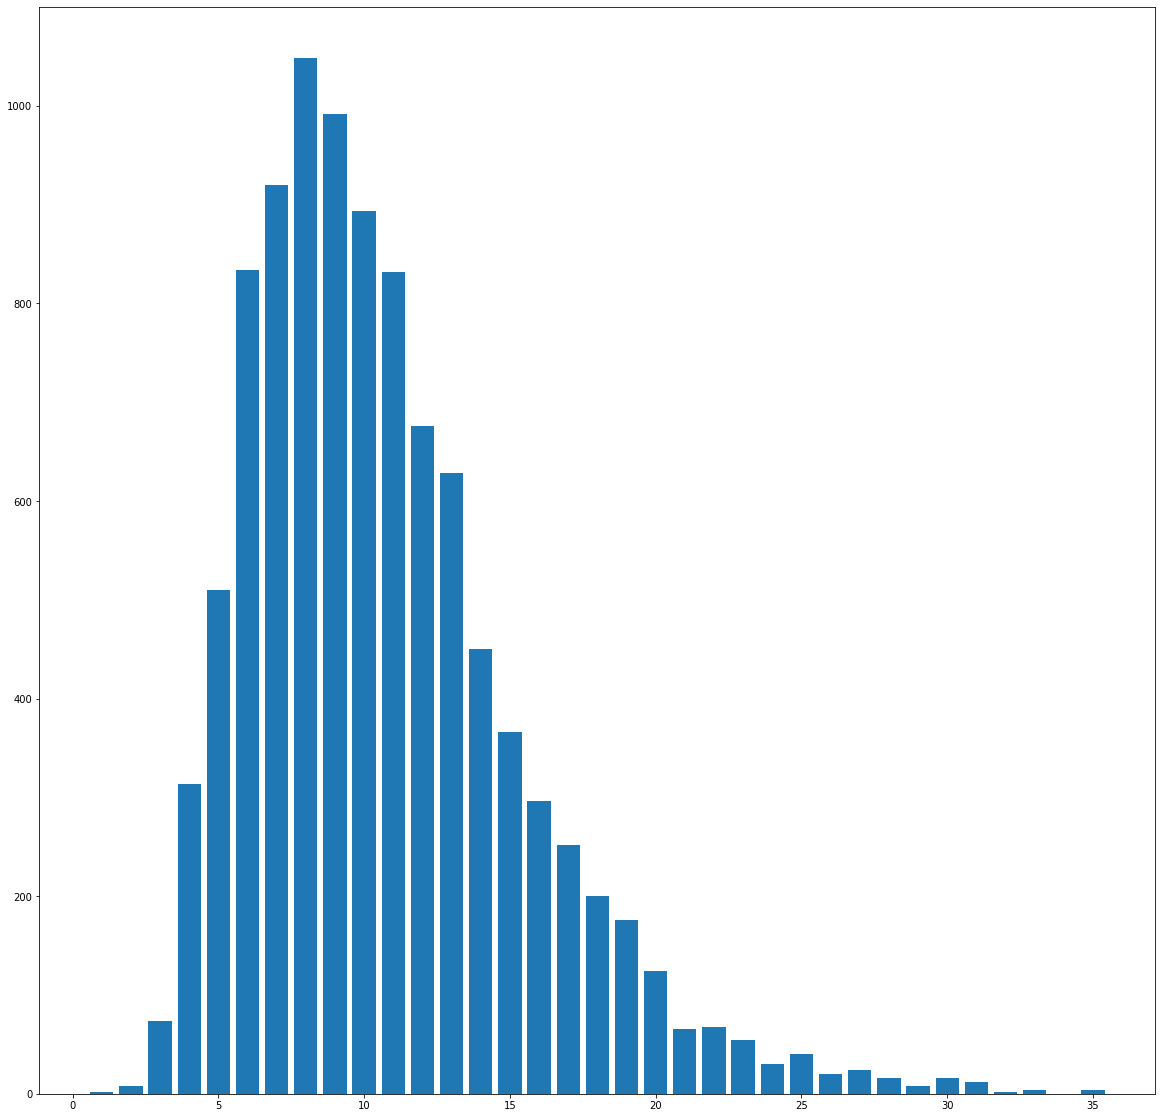

In [56]:
value_counts=valid['hypothesis_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Visualize vi-vi total length distribution



(None, 100)

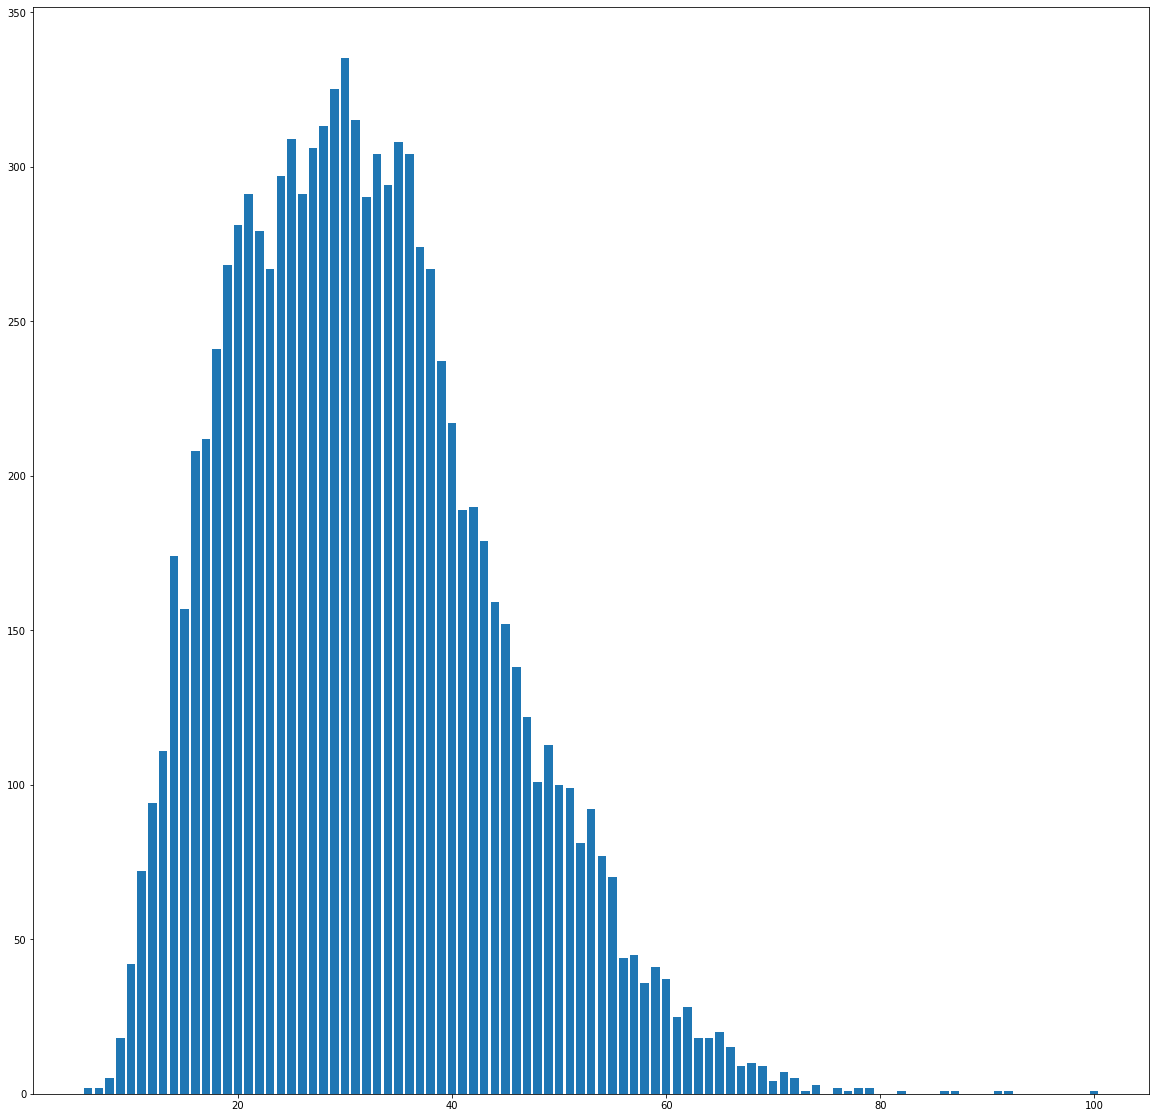

In [57]:
value_counts=valid['total_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

Note: if using all sentences en-vi and vi-vi -> max length is 100



In [58]:
pre_dataset_directory="/content/drive/MyDrive/en-vi-nli/pre_dataset"
os.makedirs(pre_dataset_directory,exist_ok=True)

In [59]:
train.to_csv(f'{pre_dataset_directory}/train.csv',index=False)
valid.to_csv(f'{pre_dataset_directory}/valid.csv',index=False)

because of the limitation GPU Tesla T4, I only get the sentences which have max length 60 from each set



In [60]:
train=train[train['total_length']<=100]

In [62]:
train.to_csv(f'{pre_dataset_directory}/train_100.csv',index=False)


In [65]:
train

,premise,hypothesis,label,premise_language,hypothesis_language,premise_length,hypothesis_length,total_length
0,Conceptually cream skimming has two basic dime...,Sản phẩm và địa lý là những gì làm cho kem ski...,1,en,vi,10,14,24
1,you know during season and i guess at your lev...,Anh sẽ mất mọi thứ ở mức độ sau nếu người dân ...,0,en,vi,52,14,66
2,One of our number will carry out your instruct...,Một thành viên trong đội của tôi sẽ thực hiện ...,0,en,vi,10,21,31
3,How do you know All this their information again,Thông tin này thuộc về họ,0,en,vi,9,6,15
4,i tell you what though if you go price some of...,Đôi giày tennis có một tầm giá,1,en,vi,29,7,36
...,...,...,...,...,...,...,...,...
1570491,Clearly California can and must do better,California can not do any better,2,en,en,7,6,13
1570492,It was once regarded as most beautiful street ...,So many of original buildings had been replace...,1,en,en,26,11,37
1570493,Houseboats are beautifully preserved tradition...,The tradition of houseboats originated while B...,0,en,en,10,12,22
1570494,Obituaries fondly recalled his on air debates ...,The obituaries were beautiful and written in k...,1,en,en,23,14,37
